### 1.10

In [ ]:
# Slot machine reward distribution
rewards = [0, 5, 10, 20]  # Dollar amounts
probabilities = [0.35, 0.3, 0.25, 0.1]  # Probabilities

#Second slot machine with new reward distribution
rewards2 = [0, 5, 10, 20]  # Dollar
probabilities2 = [0.3, 0.35, 0.3, 0.05]  # New Probabilities

# Calculate the distribution of the sum
sum_distribution = {}
for r_reward, r_prob in zip(rewards, probabilities):
    for s_reward, s_prob in zip(rewards2, probabilities2):
        total = r_reward + s_reward
        prob = r_prob * s_prob
        if total not in sum_distribution:
            sum_distribution[total] = 0
        sum_distribution[total] += prob

# Sort by total reward
sorted_sum = sorted(sum_distribution.items())
sum_totals = [x[0] for x in sorted_sum]
sum_probs = [x[1] for x in sorted_sum]

print("Distribution of the Sum of Rewards P(R+S):")
print(f"{'Sum of Rewards':<18} {'Probability':<15}")
print("-" * 35)
for total, prob in sorted_sum:
    print(f"${total:<17} {prob:.4f} ({prob:.2%})")



Distribution of the Sum of Rewards P(R+S):
Sum of Rewards     Probability    
-----------------------------------
$0                 0.1050 (10.50%)
$5                 0.2125 (21.25%)
$10                0.2850 (28.50%)
$15                0.1775 (17.75%)
$20                0.1225 (12.25%)
$25                0.0500 (5.00%)
$30                0.0425 (4.25%)
$40                0.0050 (0.50%)


### 1.14 (*)

Since both slot machines are independent, the probability of the sum of both machines being more than 20 is:
P(R+S > 20 | R = 10) = P(S > 10) = P(S = 20) = 0.05

### 2

### 3.4
After including the additional ten samples, the expected value becomes 6.5. This value is much closer to the "real" expectation of machine R (6) than to that of machine S (5.75). We also observe two occurrences of a reward of 20, which has a significantly lower probability under machine S than under machine R. These observations therefore suggest that the player was most likely using machine R.

However, the empirical standard deviation is 6.15, indicating a high level of variability in the observed rewards. Due to this large variance and the relatively small sample size, the conclusion remains uncertain and should be interpreted with caution.

### 3.5
Since believe that the player is using machine R, the expectation for the 21st play is that the reward will follow the same distribution as machine R. In that case, the expected reward is 6.

However, the high standard deviation makes this expectation uncertain and limits the strength of the conclusion.

### 4.2

State: Potition in X,Y grid.

Reward: +1 for each til cleaned, -0.2 for each move, -1 for crash

Action: Up,Down,Right,Left

Exercise 4.2

States: we can map the surfaces that needs to be cleaned as an x,y grid where each cell represents a part of the room. The state would then be the current position of the robot on this grid and which cells have been cleaned.

Actions: The actions would be the possible movements the robot can make (up, down, left, right) and an action to vacuum the current cell.

Rewards: The robot would recieve a positive reward for vacuuming a cell that is dirty and a small negative reward for each movement to encourage efficiency. As it is a house cleaning robot, we can also impose a negative reward for crashing into obstacles or walls.

### 4.6
The competing robot’s behaviour is likely related to how it was trained. If the reward function values  efficiency or speed while assigning no penalty to collisions, the robot may learn an aggressive policy that prioritizes coverage over safety. As a result, the robot may frequently hit obstacles because such behaviour is not penalized. 

Exercise 4.6

The reason for the competing robot crashing more, but performing better in other ways, can be that the competing firm has prioritized performance (time, efficient sweeping) over safety (avoiding crashes). 
It could for example be that the competing robot drives faster, which increases the chance of crashing, but also allows it to finish the task quicker.
For sure the competing robot has a less negative reward for crashing, which leads it to adapt policies that crash more often.

### 4.7
From a technical perspective, deploying the robot on factory floors instead of in homes is risky due to the significant difference between the training and deployment environments. Factory floors typically involve different conditions, and requirements. This may cause a policy trained in homes to generalize poorly. This shift could lead to reduced performance or unsafe behaviour. It would therefore be important to retrain the robot in factory like environments. It is also likely that the competing robot will be better than ours in a factory aswell, because factories usually have larger spaces, and less obstacles.

Exercise 5

We find the choice to use RL in this scenario inappropriate as it would face some ethical and practical challenges.
Firstly, RL typically requires a large number of interactions with the environment to learn an effective policy. This is ethically problematic as it would risk the first applicants to not be considered fairly, as the system would be learning and making mistakes during this period.

Secondly, the recruitment process often involves subjective judgments and qualitative factors that are difficult to represent and incorporate into a reward function. E.g. it would be difficult to design well-structured reward functions that capture all relevant aspects of a candidate's potential. One could argue that you can create some kind of efficiency measure, but the data collection for this would likely take a long time and be very noisy.



Exercise 6. MABs

Giving three different vaccines to the same population and gradually estimating which vaccine is the most efficient based on a relevant reward measure. To get these estimates you would need to use exploration vs exploitation strategies to make sure you get good estimates of each vaccine's efficiency. A good strategy would ensure that you gradually would shift towards giving the most efficient vaccine to the majority of the population and thus maximize your goal.

This MAB approach can be more sensible than a RCT (randomized control trial) as it is adaptive and will gradually give more people the best vaccine. This can be crucial in for example a pandemic situation where you want to maximize the efficiency of the vaccine rollout as quickly as possible and not wait for the results of a full RCT before changing strategy.


### 8.1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from bandit import Bandits_one
SEED = 42

In [3]:
def epsilon_greedy(MAB,time,epsilon):
    
    expected_rewards = np.zeros(MAB.k)   # estimated rewards|ai to zero
    action_count = np.zeros(MAB.k,dtype=int)   # action_counts initialized to zero


    actions = np.zeros(time, dtype=int)
    rewards = np.zeros(time)

    for t in range(time):
        # sample e from Uniform[0,1]
        if np.random.rand() < epsilon:
            action = np.random.randint(MAB.k) # random action
        else:
            action = np.argmax(expected_rewards) # greedy action
    
        # take action and observe reward
        observation,reward,terminated,truncated,info = MAB.step(action)

        # update counters and estimates
        action_count[action] += 1
        expected_rewards[action] += (reward - expected_rewards[action]) / action_count[action]
    
        actions[t] = action
        rewards[t] = reward

    return expected_rewards, action_count, actions, rewards


In [4]:
def decaying_epsilon_greedy(MAB,time,epsilon,alpha):
    
    expected_rewards = np.zeros(MAB.k)   # estimated rewards|ai to zero
    action_count = np.zeros(MAB.k, dtype=int)  # action_counts initialized to zero

    actions = np.zeros(time, dtype=int)
    rewards = np.zeros(time)

    for t in range(time):
        # sample e from Uniform[0,1]
        if np.random.rand() < epsilon:
            action = np.random.randint(MAB.k) # random action
        else:
            action = np.argmax(expected_rewards) # greedy action
    
        # take action and observe reward

        observation,reward,terminated,truncated,info = MAB.step(action)

        # update counters and estimates
        action_count[action] += 1
        expected_rewards[action] += (reward - expected_rewards[action]) / action_count[action]

        actions[t] = action
        rewards[t] = reward

        # decay epsilon
        epsilon = alpha * epsilon

    return expected_rewards, action_count, actions, rewards

In [5]:
def UCB(MAB, time, c):

    expected_rewards = np.zeros(MAB.k)   # estimated rewards|ai to zero
    action_count = np.zeros(MAB.k, dtype=int)  # action_counts initialized to zero

    actions = np.zeros(time, dtype=int)
    rewards = np.zeros(time)

    for t in range(1, time + 1):
        # evaluate UCB for all actions
        U = np.zeros(MAB.k)
        for i in range(MAB.k):
            if action_count[i] == 0:
                U[i] = np.inf   # force exploration
            else:
                U[i] = np.sqrt(np.log(t) / action_count[i])

        # select action that maximizes Q + c * U
        action = np.argmax(expected_rewards + c * U)

        # take action and observe reward
        observation, reward, terminated, truncated, info = MAB.step(action)

        # update counters and estimates
        action_count[action] += 1
        expected_rewards[action] += (reward - expected_rewards[action]) / action_count[action]


        actions[t - 1] = action
        rewards[t - 1] = reward
    return expected_rewards, action_count, actions, rewards


### 8.2

In [6]:
T = 1000
# epsilon-greedy
env = Bandits_one()

Eexpected_rewards, Eaction_count, Eactions, Erewards= epsilon_greedy(env, T, epsilon=0.1)
print("Epsilon-greedy best arm:", np.argmax(Eexpected_rewards))

# decaying epsilon-greedy
env = Bandits_one()

DEexpected_rewards, DEaction_count, DEactions, DErewards= decaying_epsilon_greedy(env, T, epsilon=1.0, alpha=0.995)
print("Decaying epsilon-greedy best arm:", np.argmax(DEexpected_rewards))

# UCB
env = Bandits_one()
UCBexpected_rewards, UCBaction_count, UCBactions, UCBrewards = UCB(env, T, c=2.0)
print("UCB best arm:", np.argmax(UCBexpected_rewards))

print("True optimal arm:", env.get_optimal_action())

Epsilon-greedy best arm: 2
Decaying epsilon-greedy best arm: 2
UCB best arm: 2
True optimal arm: 2


### 8.3

In [7]:
REPEATS = 20
T = 1000

eps_mean_rewards = []
decay_mean_rewards = []
ucb_mean_rewards = []

for r in range(REPEATS):
    env = Bandits_one()
    Q, N, A, R = epsilon_greedy(env, T, epsilon=0.1)
    eps_mean_rewards.append(np.mean(R))

    env = Bandits_one()
    Q, N, A, R = decaying_epsilon_greedy(env, T, epsilon=1.0, alpha=0.995)
    decay_mean_rewards.append(np.mean(R))

    env = Bandits_one()
    Q, N, A, R = UCB(env, T, c=2.0)
    ucb_mean_rewards.append(np.mean(R))

print("Avg reward over 20 runs:")
print("epsilon-greedy:", np.mean(eps_mean_rewards))
print("decaying eps  :", np.mean(decay_mean_rewards))
print("UCB           :", np.mean(ucb_mean_rewards))

bandits = Bandits_one()
print("Optimal medicine (true):", bandits.get_optimal_action())



Avg reward over 20 runs:
epsilon-greedy: 2.916928048831358
decaying eps  : 2.804414981560128
UCB           : 2.9177432925098046
Optimal medicine (true): 2


### 8.4

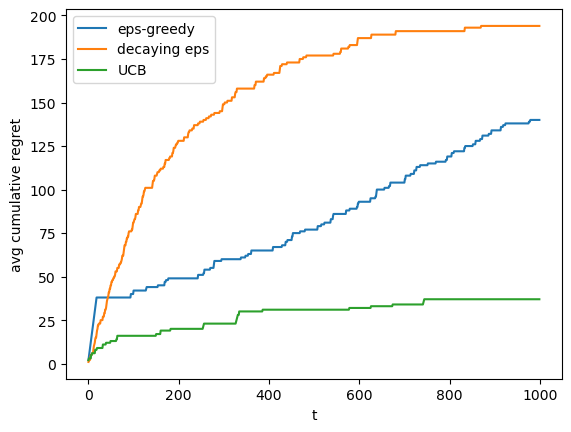

In [8]:
REPEATS = 20
T = 1000

def cummulative_regret(env, A):
    return np.cumsum(env.get_optimal_expected_reward() - env.means[A])

reg_eps = np.zeros((REPEATS, T))
reg_decay = np.zeros((REPEATS, T))
reg_ucb = np.zeros((REPEATS, T))

for r in range(REPEATS):
    env = Bandits_one()
    _, _, A, _ = epsilon_greedy(env, T, epsilon=0.1)
    reg_eps[r] = cummulative_regret(env, A)

    env = Bandits_one()
    _, _, A, _ = decaying_epsilon_greedy(env, T, epsilon=1.0, alpha=0.995)
    reg_decay[r] = cummulative_regret(env, A)

    env = Bandits_one()
    _, _, A, _ = UCB(env, T, c=2.0)
    reg_ucb[r] = cummulative_regret(env, A)

plt.plot(reg_eps.mean(axis=0), label="eps-greedy")
plt.plot(reg_decay.mean(axis=0), label="decaying eps")
plt.plot(reg_ucb.mean(axis=0), label="UCB")
plt.xlabel("t")
plt.ylabel("avg cumulative regret")
plt.legend()
plt.show()


Yes, it matches the asymptotic behaviour presented in class.

### 8.5


In [9]:
REPEATS = 20
T = 1000

def final_regret(env, A):
    return np.sum(env.get_optimal_expected_reward() - env.means[A])

print("Tuning epsilon (eps-greedy):")
for eps in [0.01, 0.1, 0.3]:
    vals = []
    for r in range(REPEATS):
        env = Bandits_one()
        _, _, A, _ = epsilon_greedy(env, T, epsilon=eps)
        vals.append(final_regret(env, A))
    print(eps, "->", np.mean(vals))

print("\nTuning alpha (decaying eps):")
for alpha in [0.99, 0.995, 0.999]:
    vals = []
    for r in range(REPEATS):
        env = Bandits_one()
        _, _, A, _ = decaying_epsilon_greedy(env, T, epsilon=1.0, alpha=alpha)
        vals.append(final_regret(env, A))
    print(alpha, "->", np.mean(vals))

print("\nTuning c (UCB):")
for c in [0.5, 2.0, 5.0]:
    vals = []
    for r in range(REPEATS):
        env = Bandits_one()
        _, _, A, _ = UCB(env, T, c=c)
        vals.append(final_regret(env, A))
    print(c, "->", np.mean(vals))


Tuning epsilon (eps-greedy):
0.01 -> 479.0
0.1 -> 140.0
0.3 -> 290.0

Tuning alpha (decaying eps):
0.99 -> 94.0
0.995 -> 194.0
0.999 -> 572.0

Tuning c (UCB):
0.5 -> 8.0
2.0 -> 37.0
5.0 -> 178.0


### 8.6
The new problem with four medicines can be solved using the same algorithms by simply increasing the number of arms from three to four.It is not necessary to restart completely from scratch, the estimates for the original medicines A,B,C can be reused, while the new medicine D can be initialized with zero counts and estimates. However, some additional exploration is required to properly evaluate the new arm.

### 8.7

In [10]:
from bandit import Bandits_three

T = 1000

# epsilon-greedy
env = Bandits_three()
Qe, Ne, Ae, Re = epsilon_greedy(env, T, epsilon=0.1)
print("epsilon-greedy best arm:", np.argmax(Qe))

# decaying epsilon-greedy
env = Bandits_three()
Qd, Nd, Ad, Rd = decaying_epsilon_greedy(env, T, epsilon=1.0, alpha=0.995)
print("decaying epsilon-greedy best arm:", np.argmax(Qd))

# UCB
env = Bandits_three()
Qu, Nu, Au, Ru = UCB(env, T, c=2.0)
print("UCB best arm:", np.argmax(Qu))

print("True optimal arm:", env.get_optimal_action())
print("True means:", env.means)


epsilon-greedy best arm: 2
decaying epsilon-greedy best arm: 0
UCB best arm: 2
True optimal arm: 2
True means: [2.  1.5 2.2]


### 8.8

In [11]:
REPEATS = 20
T = 1000

eps_avg_reward = []
decay_avg_reward = []
ucb_avg_reward = []



for r in range(REPEATS):
    # epsilon-greedy
    env = Bandits_three()
    Q, N, A, R = epsilon_greedy(env, T, epsilon=0.1)
    eps_avg_reward.append(np.mean(R))

    # decaying epsilon-greedy
    env = Bandits_three()
    Q, N, A, R = decaying_epsilon_greedy(env, T, epsilon=1.0, alpha=0.995)
    decay_avg_reward.append(np.mean(R))

    # UCB
    env = Bandits_three()
    Q, N, A, R = UCB(env, T, c=2.0)
    ucb_avg_reward.append(np.mean(R))
    
print("Avg reward over 20 runs:")
print("epsilon-greedy:", np.mean(eps_avg_reward))
print("decaying eps  :", np.mean(decay_avg_reward))
print("UCB           :", np.mean(ucb_avg_reward))


env = Bandits_three()
print("\nOptimal medicine (true):", env.get_optimal_action())
print("True means:", env.means)


Avg reward over 20 runs:
epsilon-greedy: 2.2180038491192513
decaying eps  : 1.9611858047620239
UCB           : 2.1107558128580464

Optimal medicine (true): 2
True means: [2.  1.5 2.2]


### 8.9

Bandits_one() is easier to solve than Bandits_three() because the difference between the expected rewards of the arms is larger. This leads to lower regret and faster identification of the optimal arm, while Bandits_three() requires more exploration due to smaller reward differences.

### 8.10

In [12]:
from bandit import Bandits_four

T = 1000

# Gene = 0
env0 = Bandits_four(gene=0)
env0._step = 0
Q0, N0, A0, R0 = UCB(env0, T, c=2.0)
print("G=0 best arm learned:", np.argmax(Q0))
print("G=0 true best arm    :", env0.get_optimal_action())

# Gene = 1
env1 = Bandits_four(gene=1)
env1._step = 0
Q1, N1, A1, R1 = UCB(env1, T, c=2.0)
print("G=1 best arm learned:", np.argmax(Q1))
print("G=1 true best arm    :", env1.get_optimal_action())



G=0 best arm learned: 2
G=0 true best arm    : 2
G=1 best arm learned: 0
G=1 true best arm    : 0


### 8.11


In [13]:
env0 = Bandits_four(gene=0)
env1 = Bandits_four(gene=1)

print("Expected rewards given G=0 (X,Y,Z):", env0.means[0])
print("Expected rewards given G=1 (X,Y,Z):", env1.means[1])


Expected rewards given G=0 (X,Y,Z): [1.  2.  2.2]
Expected rewards given G=1 (X,Y,Z): [3.  1.  2.2]


### 8.12

No, the optimal action is not the same for all patients. In Bandits_four(), the optimal medicine depends on the gene value G. When 𝐺=0, one medicine is optimal, while for 𝐺=1 a different medicine yields the highest expected reward. This differs from Bandits_three(), where the optimal action is the same for all episodes. The problem in Bandits_four() is therefore a contextual bandit problem, where the optimal policy depends on observed patient information.

### 8.13

Since clinical studies confirm that the response of medicine X to the gene expression is linear, the expected reward for gene value 𝐺=0.5 can be estimated by linear interpolation between the expected rewards at 𝐺=0 and G=1.If the expected reward of X is 1 when G=0 and 3 when G=1, the estimated expected reward at G=0.5 is E[R∣X,G=0.5]=1+0.5(3−1)=2.